In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [213]:
data = pd.read_csv(r'C:\Users\Arvind\Downloads\avocado.csv')

In [241]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico,1,7


In [105]:
### checking shape and size of dataset.
data.shape

(18249, 14)

###### In our dataset contain 18249 rows and 14 columns.
###### From above visual  data.head we can see Unnamed: 0 is serial number of entries so we can delete it.

In [214]:
data.drop('Unnamed: 0', axis=1, inplace=True) ### Droping Unnamed: 0 column from our dataset.

In [172]:
### Checking type of data columns contains.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


###### Columns which contain string datatype(Object): Date, Type, region.
###### Year and rest all the columns contain integer and Float type data.

In [173]:
### Checking null value in our data set
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###### there is no null values in our product.

In [109]:
data['region'].value_counts() ### value counts in all the regions.

MiamiFtLauderdale      338
TotalUS                338
HarrisburgScranton     338
Boise                  338
Spokane                338
Pittsburgh             338
RichmondNorfolk        338
Roanoke                338
Indianapolis           338
Louisville             338
Sacramento             338
BaltimoreWashington    338
Tampa                  338
StLouis                338
Syracuse               338
Philadelphia           338
Detroit                338
BuffaloRochester       338
NorthernNewEngland     338
Seattle                338
RaleighGreensboro      338
GreatLakes             338
Atlanta                338
SouthCentral           338
California             338
Chicago                338
HartfordSpringfield    338
DallasFtWorth          338
Houston                338
Boston                 338
Albany                 338
PhoenixTucson          338
Southeast              338
Midsouth               338
NewYork                338
Plains                 338
Northeast              338
W

In [110]:
data['year'].unique() 

array([2015, 2016, 2017, 2018], dtype=int64)

###### We have 4 years data.

In [111]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

###### We have 2 types of avacado in our dataset, Conventional and organic.

In [112]:
data['Date'].value_counts() ### Value counts of each dates.

2017-01-15    108
2017-12-24    108
2018-01-14    108
2015-12-13    108
2016-04-24    108
             ... 
2016-07-10    108
2015-10-25    108
2015-12-06    107
2017-06-18    107
2017-06-25    107
Name: Date, Length: 169, dtype: int64

In [113]:
data['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
9.95            1
3.47            1
59.32           1
16090.51        1
4920.17         1
Name: XLarge Bags, Length: 5588, dtype: int64

###### There are 12048 entries for 0.00 in Xlarge bags columns.

In [114]:
### Checking dataset description
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


###### Std and Mean difference for columns Total bags, Small bags, & Xlarge bags. for rest columns data is looking fine.
###### the difference between min, max and quartiles are looking fine. except column 4770, small bags, & xlarge bags.

### Lets check data visualisation.

In [215]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### (i) Univeriate Analysis

Text(0.5, 1.0, 'Average Price')

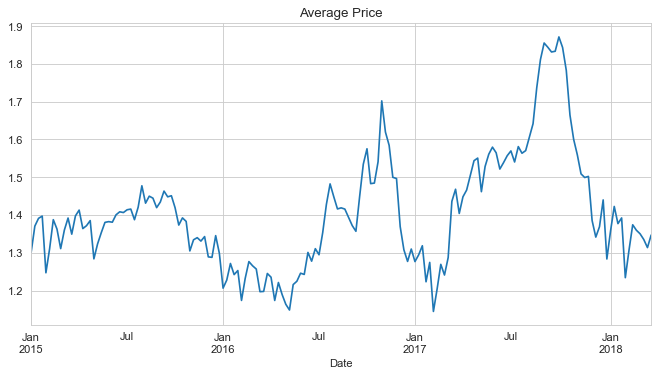

In [116]:
byDate=data.groupby('Date').mean()
plt.figure(figsize=(10,5),dpi=80)
byDate['AveragePrice'].plot()
plt.title('Average Price')

###### Above graph shows price change at various date.
###### we see in from jan 2017 to jan 2018 the price flactuation is high.

Text(0.5, 1.0, 'Average Price Per Month')

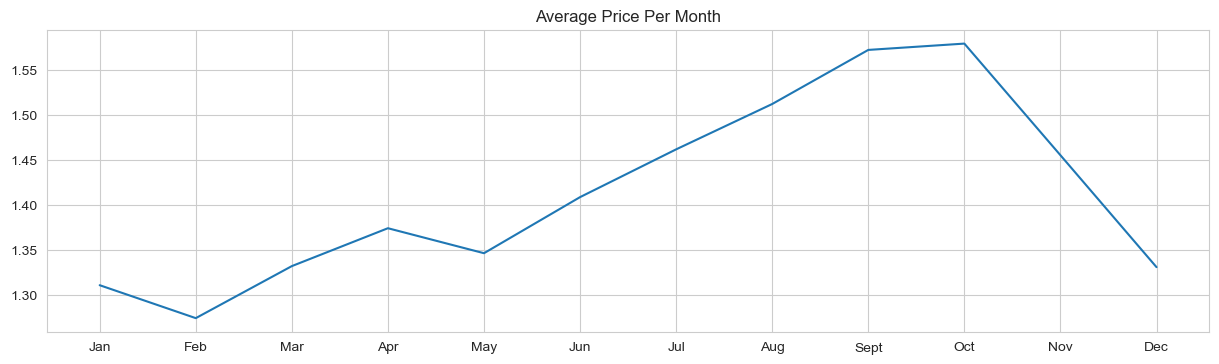

In [117]:
byMonth = data.groupby("Month").mean()
plt.figure(figsize=(15,4),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

###### as per above graph the price increases for from feb to oct and then decreases repaidly in the month of nov dec and january.

<AxesSubplot:xlabel='type', ylabel='count'>

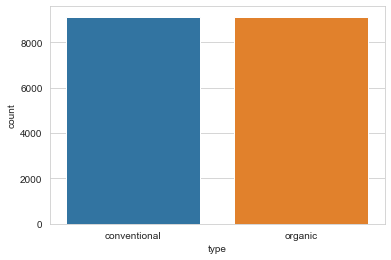

In [118]:
sns.countplot('type',data=data)

###### There is no class imbalance problem in our catagorical column.

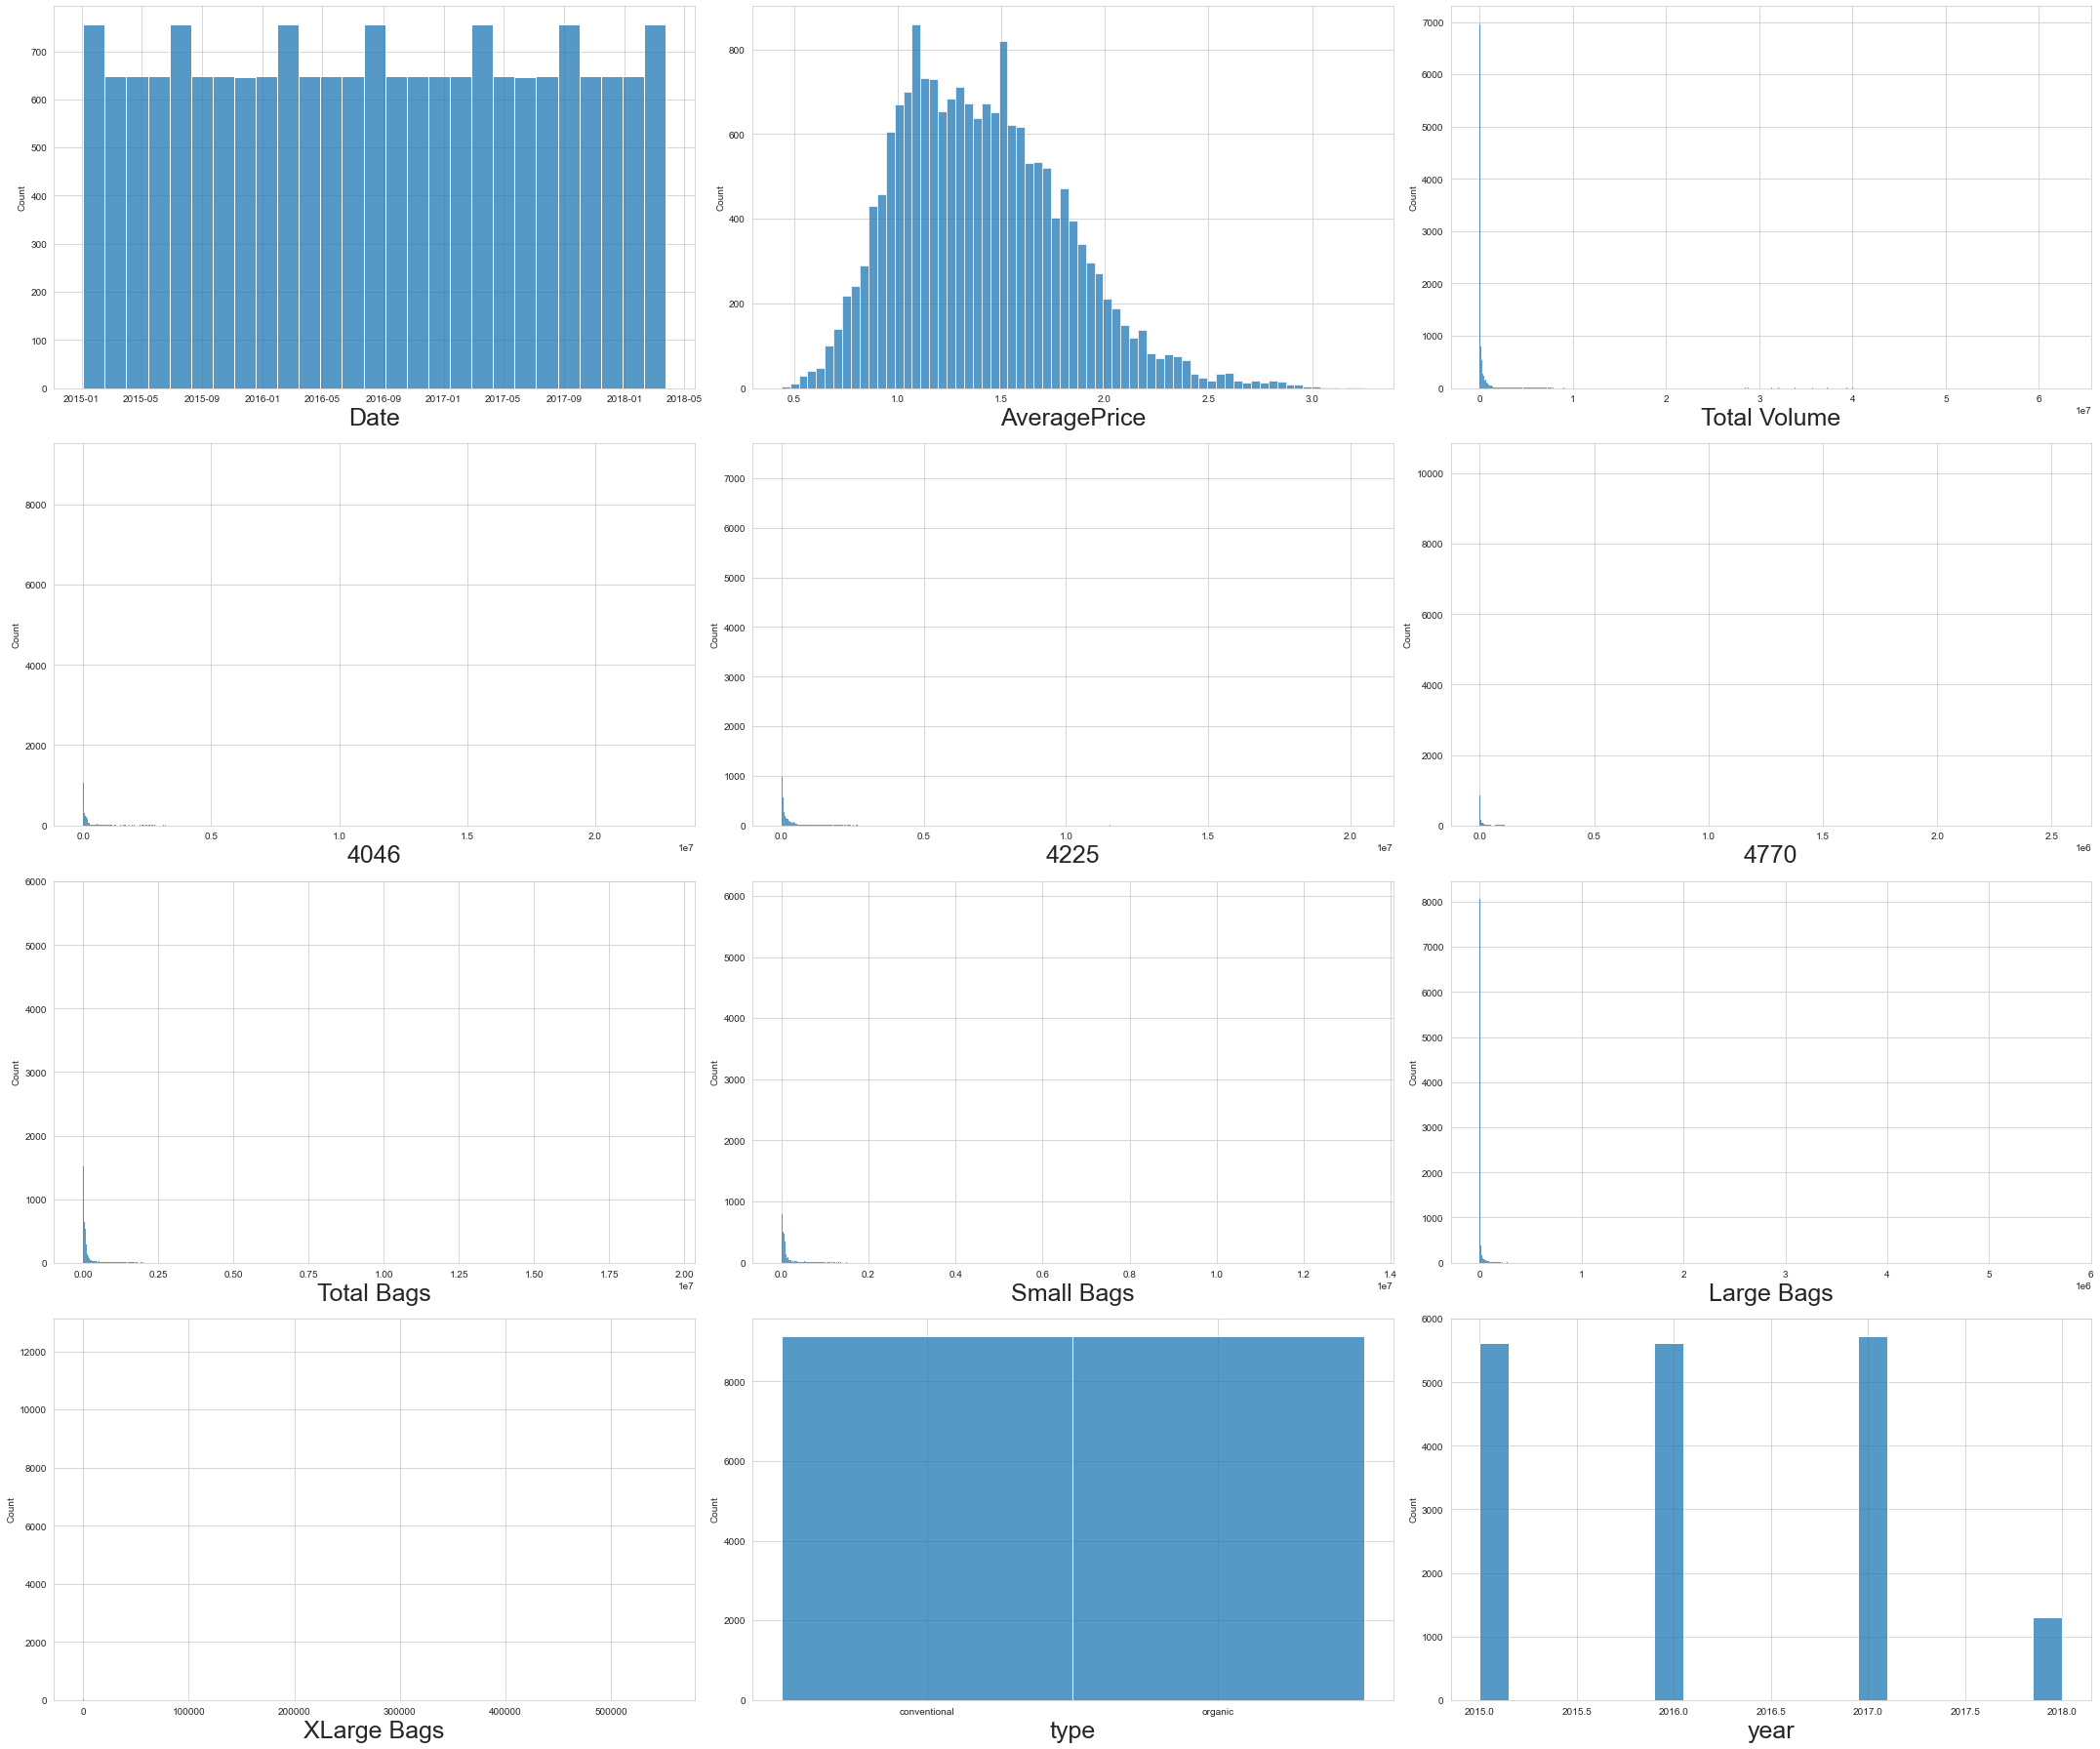

In [119]:
# Checking data distirution for all the features
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### Only for average price column data is seems like normal distribution. Rest all shows skewness lets, check with skewness in our data set.

In [120]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

###### All the columns in our dataset cantian right skewness data distribution.

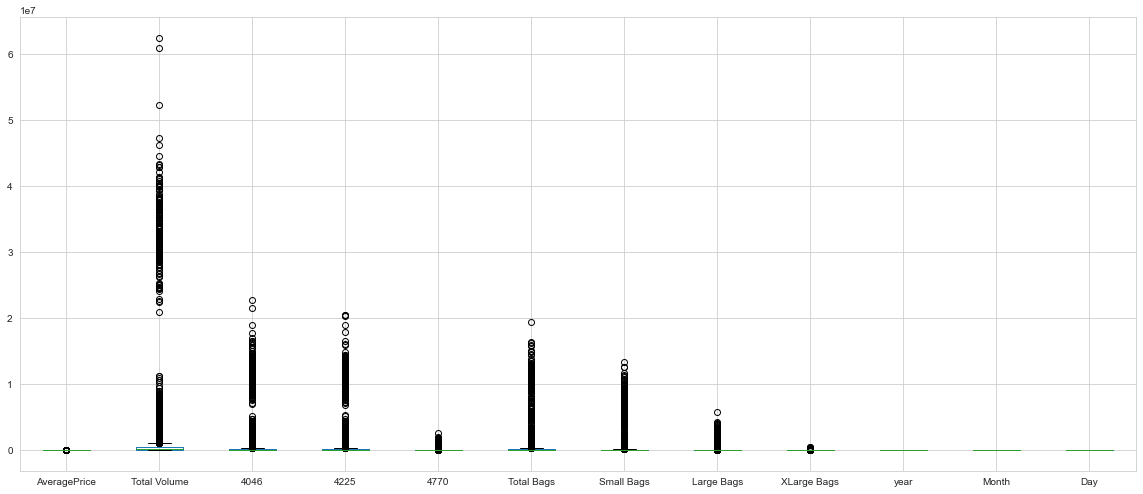

In [121]:
##### Lets check boxplot for outliers.
data.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()


###### WE can see all the  numaric columns are contain outliers. Total volumne has more number of outliers as compare to other columns. Will apply outlier removing technique and check dataloss.

##### (ii) Biveriate Analysis.

KeyboardInterrupt: 

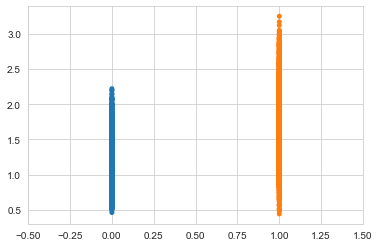

In [122]:
### Ploting average price Vs months.
sns.swarmplot(y= 'AveragePrice',x='type',data=data)

###### We can see Organic type avacado is more costly then Conventional

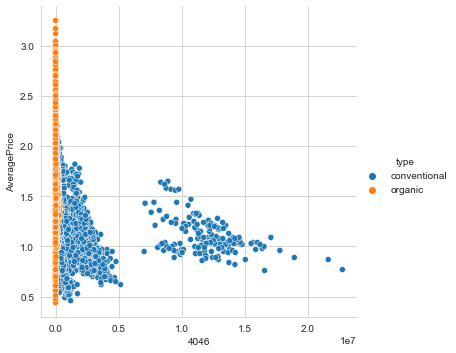

In [158]:
sns.relplot(x = '4046',y = 'AveragePrice',data=data,hue='type')

###### We can see in PLU 4046 variety Conventional type avacado has average price around 2.4. But for Organic one the price goes to 3.5

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

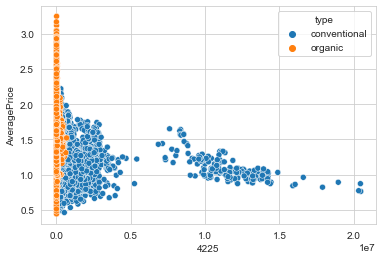

In [124]:
sns.scatterplot(x ='4225', y='AveragePrice',data=data, hue=data['type'])

###### PLU 4225 we can see the price level is less for Conventional avacado as compare to Organic one.

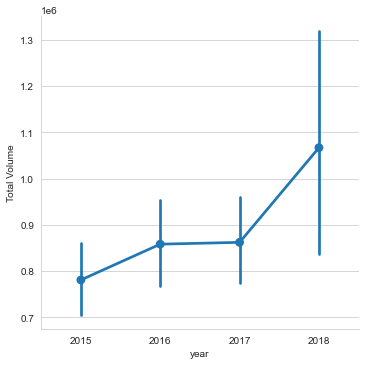

In [125]:
sns.catplot(x = 'year',y = 'Total Volume',data=data, kind="point")

###### WE can see sales for avacado increases drastically after 2017. 

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

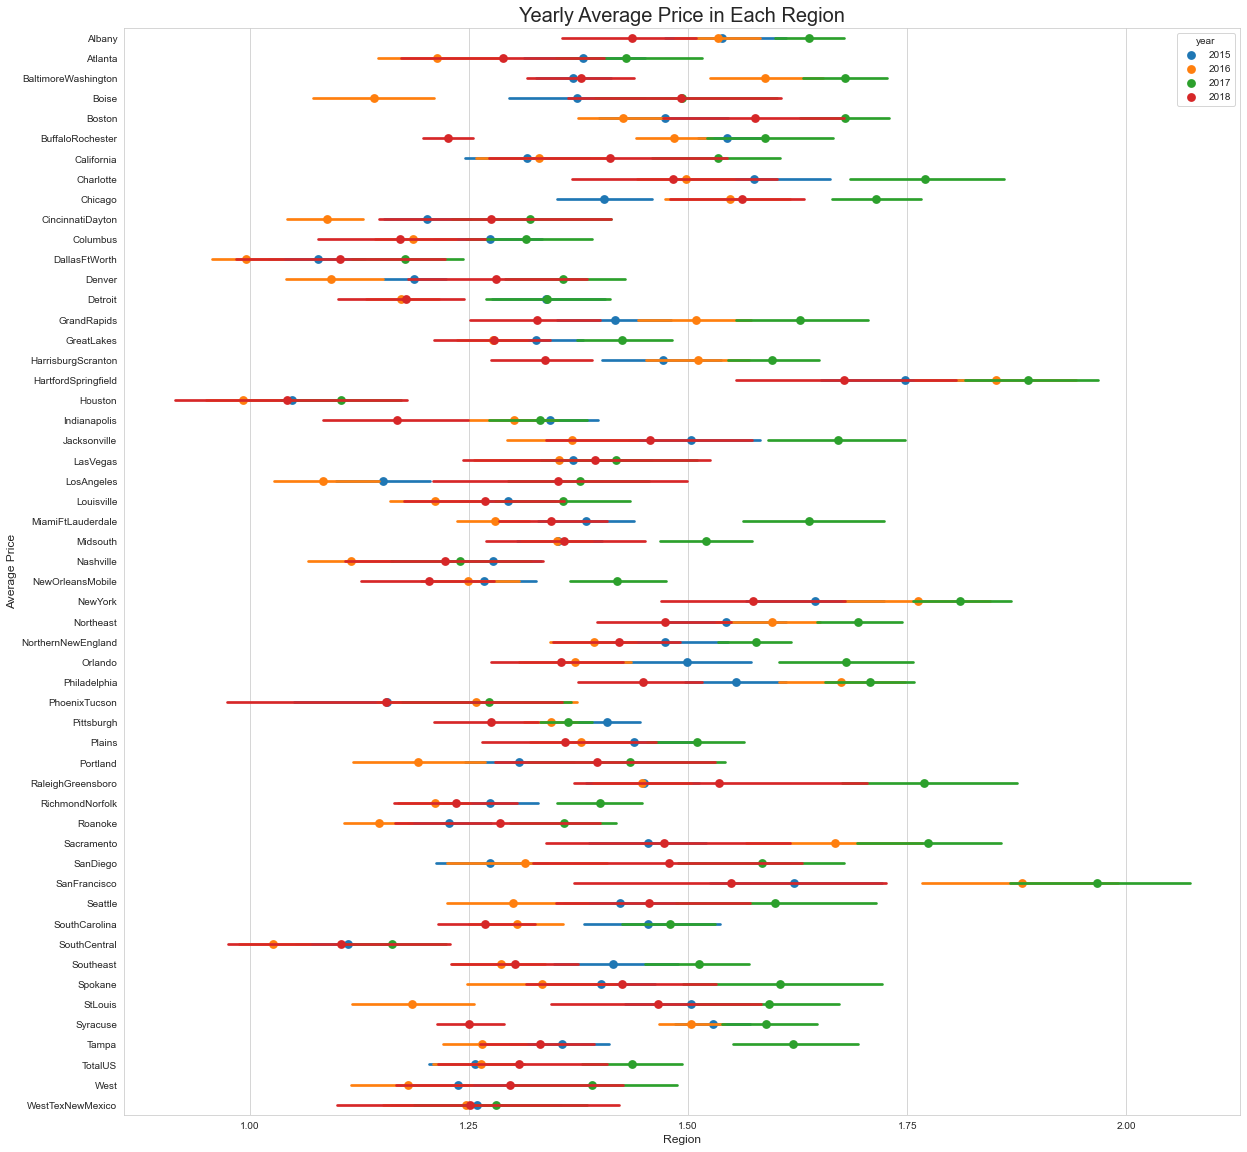

In [133]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

###### From above chart we can check average price change in each region by year.

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

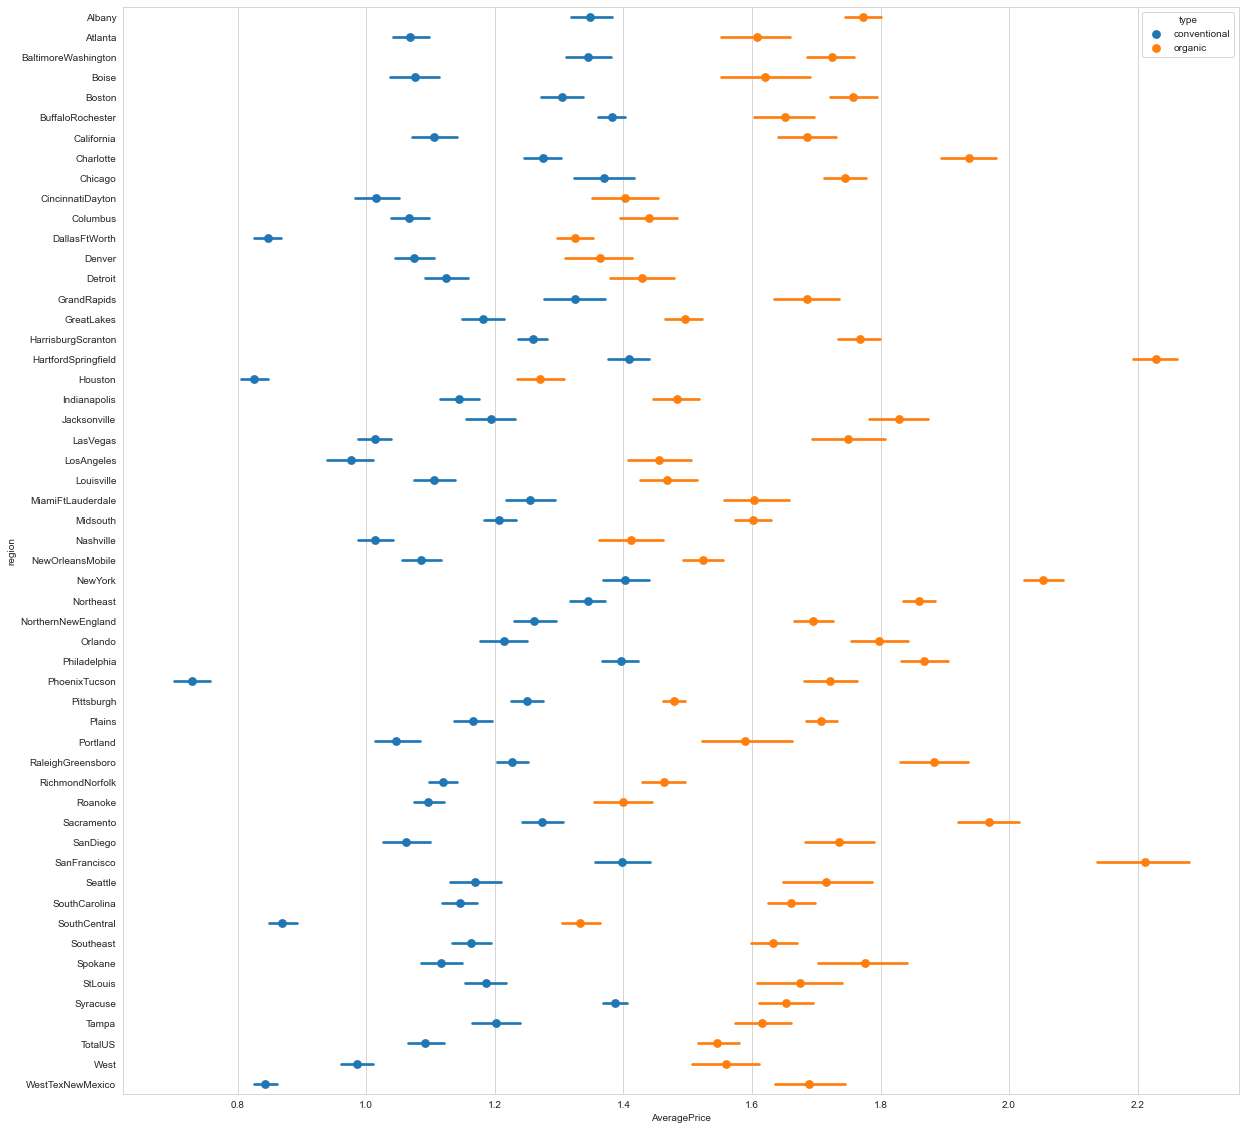

In [134]:
plt.figure(figsize=(20,20))
sns.pointplot(x='AveragePrice',y='region',data=data, hue='type',join=False)

###### From the above chart we can see the price change between both the avacado type in each region, As we can see Organic avacado is more expensive then Conventional. 

In [216]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


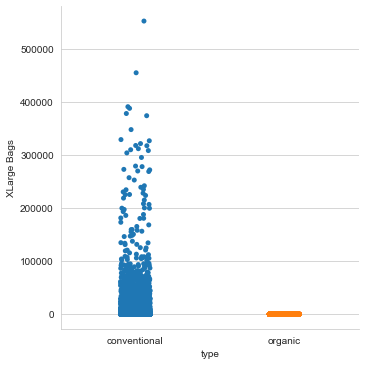

In [136]:
sns.catplot(x = 'type', y = 'XLarge Bags', data=data)

##### In Large bags we have more Conventional type avacado as compare to Organic one.

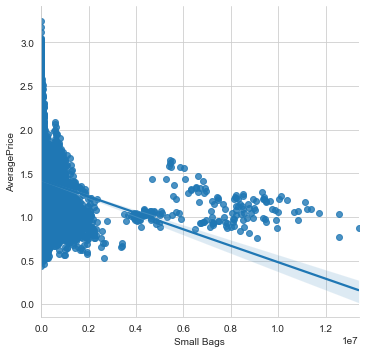

In [137]:
sns.lmplot(x = 'Small Bags', y= 'AveragePrice',data=data)

###### As we can see from above plot, if Small bags value increases then price for avacado is less. 
###### if the Small Bag value is between 0.0 to 0.2, then our average price is more.

### (iii) Multiveriate Analysis

In [220]:
### First let's convert our catagorical column in to numeric using Labelencoder.
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df = lc.fit_transform(data['type']) ### converting data into conventional = 0, organic = 1

In [221]:
data['type'] = df ### replacing type column data with df data.

<AxesSubplot:>

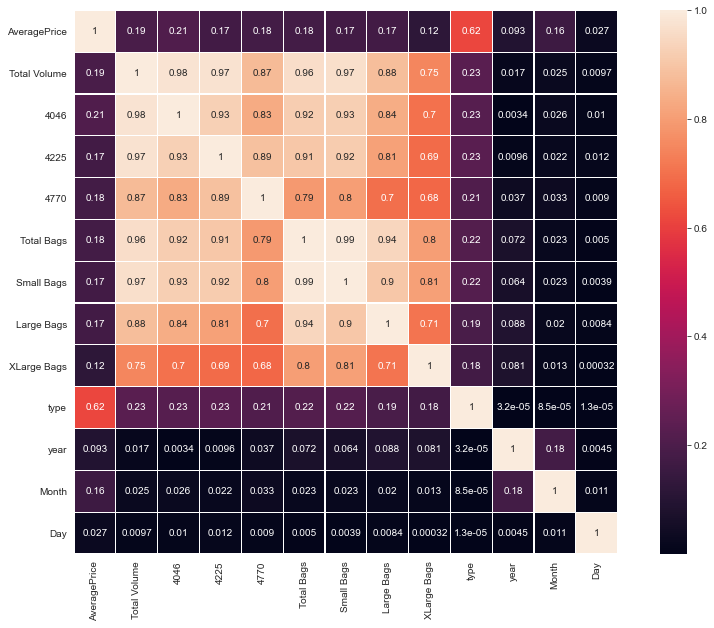

In [222]:
### Checking Correlationship between data. 
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,linewidths=0.1,square=True,annot=True)

###### from above heatmap we can see avacado type is showing 62% relationship with our data set.
###### Also we can see that xlarge bags, largebags,smallbags, total bags, 4046, 4225, 4770 and total volumne are highly correlated. because this bags contain same data in 4046, 4225, & 4770, and total bags contain data related from bags size. 

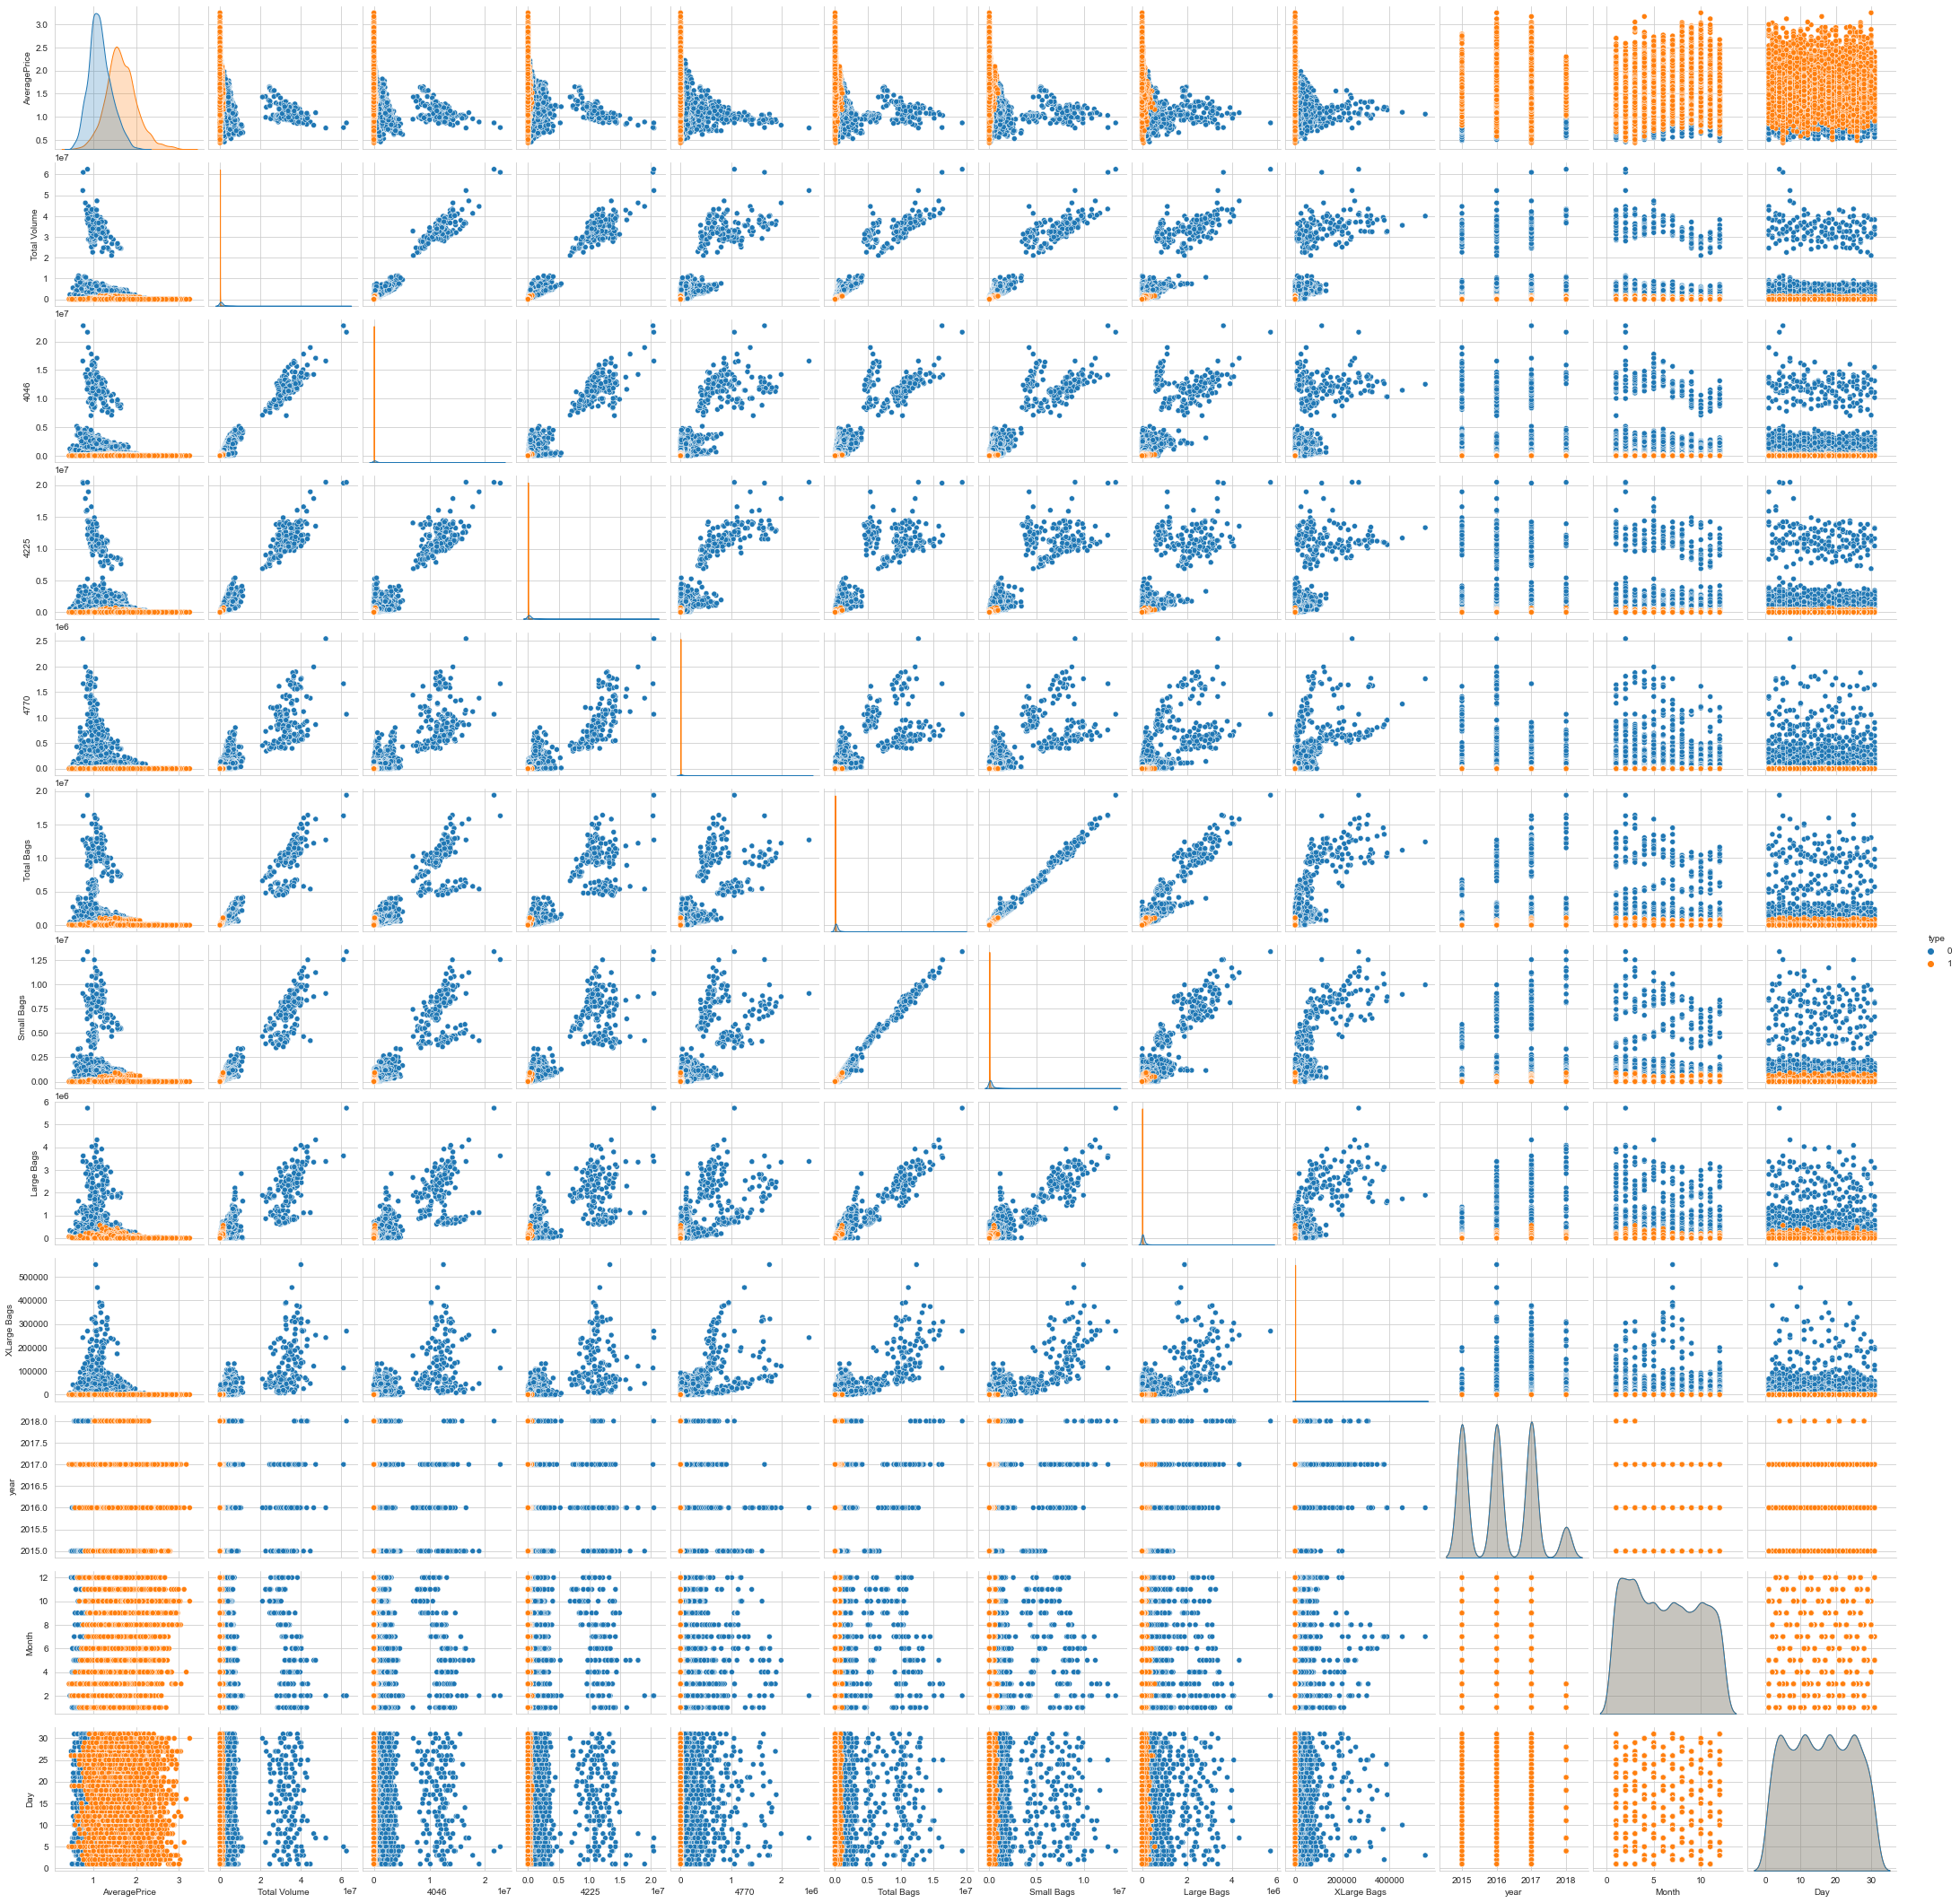

In [141]:
sns.pairplot(data,hue = 'type')

###### Using Pairplot we can clearly see that  total bags are showing linear relationship with all the bags.
###### Also total volume shows strong relationship with PLU species

### Pre-Processing

In [223]:
### We know our dataset has outliers. so lets apply zscore method to remove outlier.
from scipy.stats import zscore
z = np.abs(zscore(data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]))


In [224]:
filter_entry = (z<3).all(axis = 1)

In [225]:
df = data[filter_entry]

In [226]:
df.shape

(17782, 15)

In [227]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


In [182]:
data_loss = ((18249 - 17782)/18249)*100
data_loss

2.55904433119623

###### Only 2.5 % data loss, which is considerable.

In [228]:
df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

###### by applying Zscore our data skewness is reduced.
###### But still our dataset contain skewed data.

In [229]:
### Applying transformation techqniue to reduce skewness.
from sklearn.preprocessing import power_transform
df_new = df[['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [230]:
pt = power_transform(df_new)

In [231]:
df_new = pd.DataFrame(pt,columns=df_new.columns)

In [232]:
df_new.skew()

4046          -0.038259
4225          -0.043246
4770           0.028015
Total Bags    -0.021531
Small Bags    -0.024657
Large Bags    -0.110061
XLarge Bags    0.860603
dtype: float64

###### The skewness is removed from all the features and storing them in new dataframe df_new

### Scaling (Standardization)

In [233]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(df_new)

In [238]:
### Storing our target variable in Y
y = df['AveragePrice']

### Train - Test Split

In [239]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [240]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(13336, 7) (13336,) (4446, 7) (4446,)


### Finding best model

In [242]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [249]:
from sklearn import metrics
from sklearn.metrics import r2_score



In [250]:
print('MAE:', metrics.mean_absolute_error(y_test, y_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_lr_pred)))
print('R2_score', r2_score(y_test,y_lr_pred))

MAE: 0.2420506804845562
MSE: 0.09429251491142339
RMSE: 0.3070708630127961
R2_score 0.4045107557272023


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [251]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor() ### Instantiating DecisionTree Regressor 
dtr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_dtr_pred = dtr.predict(x_test) ### Predicting x_test using DecisionTree model.

In [252]:
print('MAE:', metrics.mean_absolute_error(y_test, y_dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_dtr_pred)))
print('R2_score', r2_score(y_test,y_dtr_pred))

MAE: 0.18387539361223568
MSE: 0.07845796221322537
RMSE: 0.28010348482877784
R2_score 0.5045113318970652


In [253]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor() ### Instantiating KNeighbors Regressor
knn.fit(x_train,y_train) ### Training our model with x_train and y_train
y_knn_pred = knn.predict(x_test) ### Predicting x_test using Kneighbors model.

In [254]:
print('MAE:', metrics.mean_absolute_error(y_test, y_knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_knn_pred)))
print('R2_score', r2_score(y_test,y_knn_pred))

MAE: 0.13992577597840752
MSE: 0.039935815564552404
RMSE: 0.19983947449028283
R2_score 0.7477917663741083


In [255]:
from sklearn.svm import SVR
svr = SVR()             ### Instantiating SVR
svr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_svr_pred = svr.predict(x_test) ### Predicting x_test using SVM model.

In [256]:
print('MAE:', metrics.mean_absolute_error(y_test, y_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_svr_pred)))
print('R2_score', r2_score(y_test,y_svr_pred))

MAE: 0.1855386144514954
MSE: 0.06398137203228138
RMSE: 0.2529453933802341
R2_score 0.5959359137378977


In [257]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor() ### Instantiating RandomForest Regressor
rfr.fit(x_train,y_train)     ### Training our model with x_train and y_train
y_rfr_pred = rfr.predict(x_test) ### Predicting x_test using Random Forest  model.

In [258]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_rfr_pred)))
print('R2_score', r2_score(y_test,y_rfr_pred))

MAE: 0.1364439721097616
MSE: 0.037241445260908675
RMSE: 0.19298042714459068
R2_score 0.7648076295888617


Text(0, 0.5, 'Predicted Y')

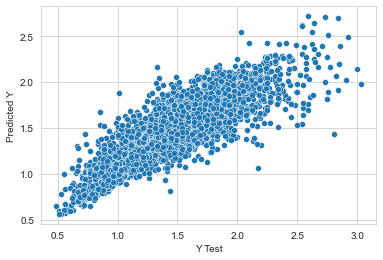

In [264]:
### Let's plot and check differnce between Y_test and y_rfr_pred 
sns.scatterplot(x= y_test,y = y_rfr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

###### As comparing r2_score for each model Random forest is giving best accuracy.
###### Also we can see the RMSE is lower as compare to other models so the RandomForest Regressor is the best model in this case.

### performing Hyper Parameter tuning.

In [265]:
from sklearn.model_selection import GridSearchCV ### Importing GridSearchCV for parameter tuning.

In [266]:
params = {'n_estimators': np.arange(100,150,10),
               'max_features': ['auto','sqrt','log'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,10,2),
               'min_samples_leaf': np.arange(5,20,5)}

In [267]:
grid_search = GridSearchCV(estimator=rfr,param_grid= params,cv=5,n_jobs= -1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': ['auto', 'sqrt', 'log'],
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [268]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 110}

In [272]:
rfr_final = RandomForestRegressor(n_estimators=100,min_samples_leaf=5,min_samples_split=2,max_features='auto',max_depth=8)

In [273]:
rfr_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=5)

In [274]:
y_final_pred = rfr_final.predict(x_test)

In [275]:
print('MAE:', metrics.mean_absolute_error(y_test, y_final_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_final_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_final_pred)))
print('R2_score', r2_score(y_test,y_final_pred))

MAE: 0.17917419072308777
MSE: 0.05768184448382341
RMSE: 0.24017044881463542
R2_score 0.6357195689159445


##### After hyperperameter tuning our model r2_score is 63% which is less then default Random forest model 76%. Hence we will go with Default model.

### Saving our model

In [280]:
import pickle
Avocado = 'Avacado.pickle'
pickle.dump(rfr,open(Avocado,'wb'))

In [281]:
load_model = pickle.load(open(Avocado,'rb'))

In [282]:
y_predict = load_model.predict(x_test)

In [283]:
r2_score(y_test,y_predict)

0.7648076295888617